<a href="https://colab.research.google.com/github/OlegKuzmin1968/Oleg_Kuzmin/blob/main/week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Decision Tree example  (Пример дерева решений)

In [ ]:
pip install scikit-learn==1.4.0

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn.tree import DecisionTreeClassifier                  # модуль для работы с деревьями
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import export_text
import graphviz
import pickle

In [ ]:
import sklearn

sklearn.__version__

'1.4.0'

## Три столбца бинарная классификация

In [ ]:
# Укажим путь к файлу с данными на моем диске
way = '/content/drive/MyDrive/Baza/Stag 3/df_iris_sagital17_4.xlsx'
df_irsa = pd.read_excel(way)  # Чтение данных из файла excel в pandas.DataFrame
print(df_irsa.shape)
li = df_irsa.columns.tolist()
print('len(li)', len(li))
df_irsa

In [ ]:
#df_irsa.sort_values('PR2_norm_Lc^')

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
age_sal_tree = DecisionTreeClassifier( max_depth=3, random_state=17)
age_sal_tree.fit(df_irsa[['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']].values, df_irsa['diagnosis'].values);

In [ ]:
export_graphviz(age_sal_tree, feature_names=['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^'],
                out_file='big_tree.dot', filled=True)
!dot -Tpng 'big_tree.dot' -o 'big_tree.png'
Image('big_tree.png')

## Три столбца N классов =4

In [ ]:
# Укажим путь к файлу с данными на моем диске
way = '/content/drive/MyDrive/Stag_3/df_iris_sagital215.xlsx'
df_irsa = pd.read_excel(way)  # Чтение данных из файла excel в pandas.DataFrame
print(df_irsa.shape)
li = df_irsa.columns.tolist()
print('len(li)', len(li))
df_irsa

In [ ]:
li_pr = li[1:4]
li_pr

вариант из лекции

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Инициализируем решающее дерево для классификации
age_sal_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)
                                                                               # способы выбора разбиений - criterion='entropy' - минимизация энтропии или максимизация прироста информации,
                                                                               # criterion=' ',  gini impurity неопределенность джини (используется по умолчанию)
                                                                               # criterion=' ', ошибка классификации
                                                                               # max_depth = 4 - глубина дерева считается по неравенствам
                                                                               # random_state=42 — можно указать для воспроизводимости экспериментов. См. ячейку ниже
                                                                               # min_samples_leaf=1  — минимальное количество элементов выборки, которые могут находиться в листовой вершине дерева
                                                                               # min_samples_split=2) - минимальное количество элементов, которое должно попасть в вершину, чтобы её можно было делить.
                                                                               # age_sal_tree(estimator) - инициализируемый классификатор
# Обучим решающее дерево (классификатор) на обучающей выборке
age_sal_tree.fit(df_irsa[['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']].values, df_irsa['diagnosis'].values); # обучаем модель


**random_state**

Целое число - int, по умолчанию = Нет. Активный random_state = 17.
Управляет случайностью оценки. Объекты всегда переставляются случайным образом при каждом разделении, даже если для разделителя установлено значение "наилучший". Когда max_features < n_features, алгоритм выберет max_features случайным образом при каждом разбиении, прежде чем найдет наилучшее разбиение среди них. Но найденное наилучшее разбиение может отличаться в разных прогонах, даже если max_features=n_features. Это имеет место, если улучшение критерия идентично для нескольких разбиений, и одно разбиение должно быть выбрано случайным образом. Чтобы получить детерминированное поведение во время подгонки, random_state должно быть зафиксировано в виде целого числа. Подробности смотрите в глоссарии.

In [ ]:
# Создадим список классов по алфавиту
clas = list(df_irsa.diagnosis.unique())
print(type(clas))
print('Список классов из DS      ',clas)
class_names = sorted (clas)
print('Список классов по алфавиту', class_names)
#class_names = ['distal','distr' , 'komp', 'norm']
# class_names = ['a','b' , 'c', 'd']  # список классов должен быть отсортирован по алфавиту

In [ ]:
# Создадим список столбцов по которым будем строить дерево решений
list_data =  ['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']

информация об обученном классификаторе

In [ ]:
# Эта функция генерирует представление дерева решений в GraphViz, которое затем записывается в out_file.
export_graphviz(age_sal_tree,                                                  # age_sal_tree- Дерево решений, которое будет экспортировано в GraphViz.
                feature_names= list_data,                                      # feature_names=['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^'], список параметров DS по которым строилось дерево
                out_file='big_tree.dot',                                       # out_file - экспортируйте дерево решений в файл в формате DOT = 'big_tree.dot' в текущуу папку colab.
                                                                               # Значение по умолчанию None. Если нет, результат возвращается в виде строки.
                class_names=class_names,                                       # class_names - rray-подобный, shape (n_classes,) или bool, по умолчанию = None
                                                                               # имена каждого из целевых классов в порядке возрастания числа или по алфавиту.
                                                                               # aктуально только для классификации и не поддерживается для множественного вывода.
                filled=True,                                                   # filled=True если установлено значение True, узлы подсвечиваются разным цветом чтобы указать класс
                rounded=True,                                                  # rounded=True, Если установлено значение True, нарисуйте прямоугольники узлов со скругленными углами.
                precision=2)                                                   # precision=2, Количество цифр точности с плавающей запятой в значениях атрибутов

!dot -Tpng 'big_tree.dot' -o 'big_tree.png'                                    # трансформируем файл dot в формат png, одновременно задаем имя файла
Image('big_tree.png')                                                          # вывод на экран изображения дерева в формате png

In [ ]:
x_trayn = df_irsa[li_pr].values
y_trayn = df_irsa['diagnosis'].values
predictions = age_sal_tree.predict(x_trayn)
print('Точность работы дерев на обучающей выборке:', round(accuracy_score(predictions, y_trayn),4))

Другой способ экспорта дерева в файл png

In [ ]:
# import graphviz
dot_data = export_graphviz(age_sal_tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

Дерево можно экспортировать в текстовый формат

In [ ]:
# Дерево можно экспортировать в текстовый формат с помощью функции export_text.
# Этот метод не требует установки внешних библиотек и более компактен:

r = export_text(age_sal_tree, feature_names=list_data)
print(r)

## Производные столбцы // N классов  = 5

In [ ]:
# Укажим путь к файлу с данными на моем диске
way = '/content/drive/MyDrive/Stag_3/df_iris_sagital215.xlsx'
df_irsa = pd.read_excel(way)  # Чтение данных из файла excel в pandas.DataFrame
print(df_irsa.shape)
li = df_irsa.columns.tolist()
print('len(li)', len(li))
df_irsa

In [ ]:
#df_irsa.sort_values('PR2_norm_Lc^')

In [ ]:
li_pr = li[4:-1]
li_pr

вариант из лекции

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Инициализируем решающее дерево для классификации
age_sal_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)
                                                                               # способы выбора разбиений - criterion='entropy' - минимизация энтропии или максимизация прироста информации,
                                                                               # criterion=' ',  gini impurity неопределенность джини (используется по умолчанию)
                                                                               # criterion=' ', ошибка классификации
                                                                               # max_depth = 4 - глубина дерева считается по неравенствам
                                                                               # random_state=42 — можно указать для воспроизводимости экспериментов. См. ячейку ниже
                                                                               # min_samples_leaf=1  — минимальное количество элементов выборки, которые могут находиться в листовой вершине дерева
                                                                               # min_samples_split=2) - минимальное количество элементов, которое должно попасть в вершину, чтобы её можно было делить.
                                                                               # age_sal_tree(estimator) - инициализируемый классификатор
# Обучим решающее дерево (классификатор) на обучающей выборке
#age_sal_tree.fit(df_irsa[['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']].values, df_irsa['diagnosis'].values); # обучаем модель
age_sal_tree.fit(df_irsa[li_pr].values, df_irsa['diagnosis'].values); # обучаем модель


**random_state**

Целое число - int, по умолчанию = Нет. Активный random_state = 17.
Управляет случайностью оценки. Объекты всегда переставляются случайным образом при каждом разделении, даже если для разделителя установлено значение "наилучший". Когда max_features < n_features, алгоритм выберет max_features случайным образом при каждом разбиении, прежде чем найдет наилучшее разбиение среди них. Но найденное наилучшее разбиение может отличаться в разных прогонах, даже если max_features=n_features. Это имеет место, если улучшение критерия идентично для нескольких разбиений, и одно разбиение должно быть выбрано случайным образом. Чтобы получить детерминированное поведение во время подгонки, random_state должно быть зафиксировано в виде целого числа. Подробности смотрите в глоссарии.

In [ ]:
# Создадим список классов по алфавиту
clas = list(df_irsa.diagnosis.unique())
print(type(clas))
print('Список классов из DS      ',clas)
class_names = sorted (clas)
print('Список классов по алфавиту', class_names)
#class_names = ['distal','distr' , 'komp', 'norm']
# class_names = ['a','b' , 'c', 'd']  # список классов должен быть отсортирован по алфавиту

In [ ]:
# Создадим список столбцов по которым будем строить дерево решений
# list_data =  ['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']
list_data =  li_pr

информация об обученном классификаторе

In [ ]:
# Эта функция генерирует представление дерева решений в GraphViz, которое затем записывается в out_file.
export_graphviz(age_sal_tree,                                                  # age_sal_tree- Дерево решений, которое будет экспортировано в GraphViz.
                feature_names= list_data,                                      # feature_names=['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^'], список параметров DS по которым строилось дерево
                out_file='big_tree.dot',                                       # out_file - экспортируйте дерево решений в файл в формате DOT = 'big_tree.dot' в текущуу папку colab.
                                                                               # Значение по умолчанию None. Если нет, результат возвращается в виде строки.
                class_names=class_names,                                       # class_names - rray-подобный, shape (n_classes,) или bool, по умолчанию = None
                                                                               # имена каждого из целевых классов в порядке возрастания числа или по алфавиту.
                                                                               # aктуально только для классификации и не поддерживается для множественного вывода.
                filled=True,                                                   # filled=True если установлено значение True, узлы подсвечиваются разным цветом чтобы указать класс
                rounded=True,                                                  # rounded=True, Если установлено значение True, нарисуйте прямоугольники узлов со скругленными углами.
                precision=2)                                                   # precision=2, Количество цифр точности с плавающей запятой в значениях атрибутов

!dot -Tpng 'big_tree.dot' -o 'big_tree.png'                                    # трансформируем файл dot в формат png, одновременно задаем имя файла
Image('big_tree.png')                                                          # вывод на экран изображения дерева в формате png

In [ ]:
x_trayn = df_irsa[li_pr].values
y_trayn = df_irsa['diagnosis'].values
predictions = age_sal_tree.predict(x_trayn)
print('Точность работы дерев на обучающей выборке:', round(accuracy_score(predictions, y_trayn),4))

## Размеры 3 столбца и производные столбцы  всего 10  // N классов  = 5

In [ ]:
# Укажим путь к файлу с данными на моем диске
way = '/content/drive/MyDrive/Stag_3/df_iris_sagital215.xlsx'
df_irsa = pd.read_excel(way)  # Чтение данных из файла excel в pandas.DataFrame
print(df_irsa.shape)
li = df_irsa.columns.tolist()
print('len(li)', len(li))
df_irsa

(215, 12)
len(li) 12


,ID,PR2_norm_Lc<,PR2_norm_Lc>,PR2_norm_Lc^,Σ/2 / Lc^,Σ/2,Δ<,%,Lc < / Lc ^,Lc > / Lc ^,Σ(3),diagnosis
0,Nw1,2.3,1.6,2.9,0.672414,1.95,-0.35,-0.152174,0.793103,0.551724,6.8,distal
1,Nw2,2.2,1.6,2.1,0.904762,1.90,-0.30,-0.136364,1.047619,0.761905,5.9,distal
2,Nw5,1.8,1.5,4.1,0.402439,1.65,-0.15,-0.083333,0.439024,0.365854,7.4,distal
3,Nw8,2.7,3.5,3.4,0.911765,3.10,0.40,0.148148,0.794118,1.029412,9.6,norm
4,Nw9,2.2,2.3,3.0,0.750000,2.25,0.05,0.022727,0.733333,0.766667,7.5,norm
...,...,...,...,...,...,...,...,...,...,...,...,...
210,Nw255,1.3,1.6,3.1,0.467742,1.45,0.15,0.115385,0.419355,0.516129,6.0,komp
211,Nw257,1.5,1.3,1.1,1.272727,1.40,-0.10,-0.066667,1.363636,1.181818,3.9,komp
212,Nw260,1.4,1.0,1.0,1.200000,1.20,-0.20,-0.142857,1.400000,1.000000,3.4,komp
213,Nw261,1.6,2.3,2.8,0.696429,1.95,0.35,0.218750,0.571429,0.821429,6.7,komp


In [ ]:
li_pr = li[1:-1]
print(len(li_pr))
li_pr

10


['PR2_norm_Lc<',
 'PR2_norm_Lc>',
 'PR2_norm_Lc^',
 'Σ/2 / Lc^',
 'Σ/2',
 'Δ<',
 '%',
 ' Lc < /  Lc ^ ',
 ' Lc > /  Lc ^ ',
 'Σ(3)']

вариант из лекции

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Инициализируем решающее дерево для классификации
age_sal_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)
                                                                               # способы выбора разбиений - criterion='entropy' - минимизация энтропии или максимизация прироста информации,
                                                                               # criterion=' ',  gini impurity неопределенность джини (используется по умолчанию)
                                                                               # criterion=' ', ошибка классификации
                                                                               # max_depth = 4 - глубина дерева считается по неравенствам
                                                                               # random_state=42 — можно указать для воспроизводимости экспериментов. См. ячейку ниже
                                                                               # min_samples_leaf=1  — минимальное количество элементов выборки, которые могут находиться в листовой вершине дерева
                                                                               # min_samples_split=2) - минимальное количество элементов, которое должно попасть в вершину, чтобы её можно было делить.
                                                                               # age_sal_tree(estimator) - инициализируемый классификатор
# Обучим решающее дерево (классификатор) на обучающей выборке
#age_sal_tree.fit(df_irsa[['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']].values, df_irsa['diagnosis'].values); # обучаем модель
age_sal_tree.fit(df_irsa[li_pr].values, df_irsa['diagnosis'].values); # обучаем модель


**random_state**

Целое число - int, по умолчанию = Нет. Активный random_state = 17.
Управляет случайностью оценки. Объекты всегда переставляются случайным образом при каждом разделении, даже если для разделителя установлено значение "наилучший". Когда max_features < n_features, алгоритм выберет max_features случайным образом при каждом разбиении, прежде чем найдет наилучшее разбиение среди них. Но найденное наилучшее разбиение может отличаться в разных прогонах, даже если max_features=n_features. Это имеет место, если улучшение критерия идентично для нескольких разбиений, и одно разбиение должно быть выбрано случайным образом. Чтобы получить детерминированное поведение во время подгонки, random_state должно быть зафиксировано в виде целого числа. Подробности смотрите в глоссарии.

In [ ]:
# Создадим список классов по алфавиту
clas = list(df_irsa.diagnosis.unique())
print(type(clas))
print('Список классов из DS      ',clas)
class_names = sorted (clas)
print('Список классов по алфавиту', class_names)
#class_names = ['distal','distr' , 'komp', 'norm']
# class_names = ['a','b' , 'c', 'd']  # список классов должен быть отсортирован по алфавиту

<class 'list'>
Список классов из DS       ['distal', 'norm', 'komp', 'distr', 'mezial']
Список классов по алфавиту ['distal', 'distr', 'komp', 'mezial', 'norm']


In [ ]:
# Создадим список столбцов по которым будем строить дерево решений
# list_data =  ['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']
list_data =  li_pr

информация об обученном классификаторе

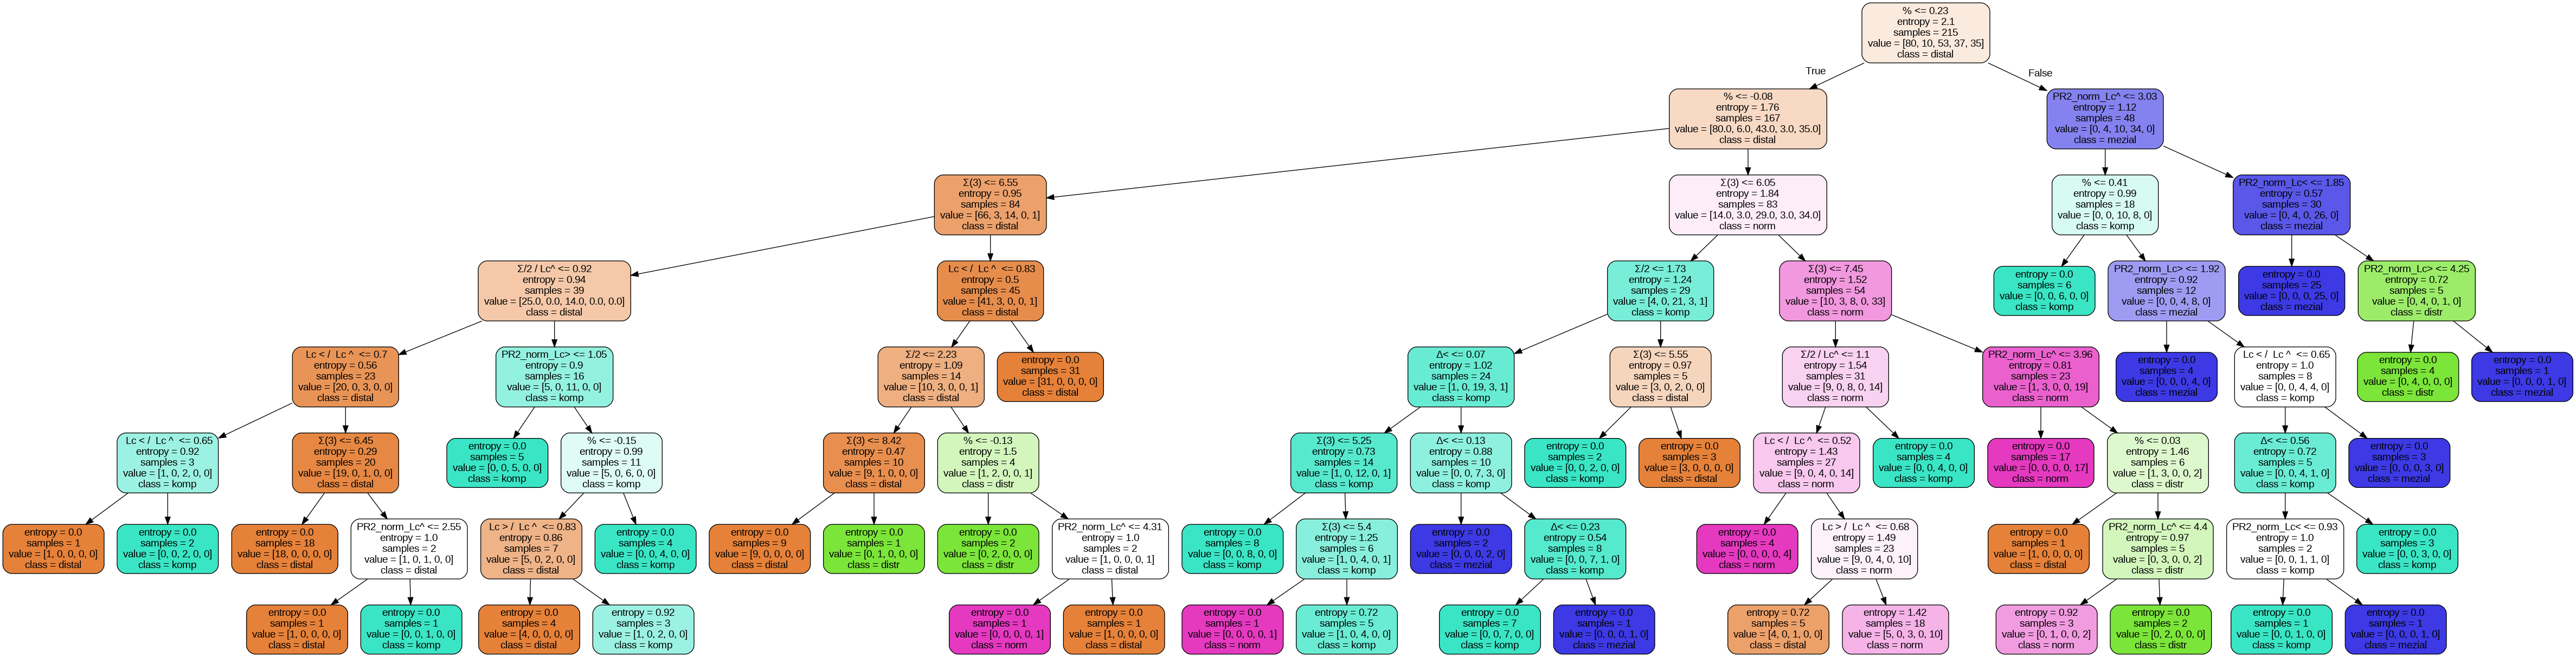

In [ ]:
# Эта функция генерирует представление дерева решений в GraphViz, которое затем записывается в out_file.
export_graphviz(age_sal_tree,                                                  # age_sal_tree- Дерево решений, которое будет экспортировано в GraphViz.
                feature_names= list_data,                                      # feature_names=['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^'], список параметров DS по которым строилось дерево
                out_file='big_tree.dot',                                       # out_file - экспортируйте дерево решений в файл в формате DOT = 'big_tree.dot' в текущуу папку colab.
                                                                               # Значение по умолчанию None. Если нет, результат возвращается в виде строки.
                class_names=class_names,                                       # class_names - rray-подобный, shape (n_classes,) или bool, по умолчанию = None
                                                                               # имена каждого из целевых классов в порядке возрастания числа или по алфавиту.
                                                                               # aктуально только для классификации и не поддерживается для множественного вывода.
                filled=True,                                                   # filled=True если установлено значение True, узлы подсвечиваются разным цветом чтобы указать класс
                rounded=True,                                                  # rounded=True, Если установлено значение True, нарисуйте прямоугольники узлов со скругленными углами.
                precision=2)                                                   # precision=2, Количество цифр точности с плавающей запятой в значениях атрибутов

!dot -Tpng 'big_tree.dot' -o 'big_tree.png'                                    # трансформируем файл dot в формат png, одновременно задаем имя файла
Image('big_tree.png')                                                          # вывод на экран изображения дерева в формате png

In [ ]:
x_trayn = df_irsa[li_pr].values
y_trayn = df_irsa['diagnosis'].values
predictions = age_sal_tree.predict(x_trayn)
print(predictions[:9])
print('Точность работы дерев на обучающей выборке:', round(accuracy_score(predictions, y_trayn),4))

['distal' 'distal' 'distal' 'norm' 'norm' 'norm' 'distal' 'distal' 'norm']
Точность работы дерев на обучающей выборке: 0.9442


## После обучения модель можно использовать для прогнозирования класса образцов:

In [ ]:
# После подбора модель можно использовать для прогнозирования класса образцов:
#pr = np.array([3.7,1.9,5.6,0.50,2.80,-0.90,-0.24,0.66,0.34,11.2])
pr = np.array([1.8,7.4,7.6,0.61,4.60,2.80,1.56,0.24,0.97,16.80])
#pr = np.array([2.6, 5.5, 4.6])
#print(pr.shape)
pr = pr.reshape(1,-1)
#print(pr.shape)

age_sal_tree.predict(pr)

y_test1 = np.array(['distr'])           # неправильный ответ
y_test2 = np.array(['mezial'])          # правильный ответ
predictions = age_sal_tree.predict(pr)  # подаем mezial

print('y_test1', accuracy_score(predictions, y_test1))
print('y_test2', accuracy_score(predictions, y_test2))

y_test1 0.0
y_test2 1.0


## Точность классификации

In [ ]:
# Посчитаем предсказания дерева и посчитаем точность полученной классификации.
# Точность классификации вычисляется как доля правильно предсказанных классов.
print(x_trayn.shape)
print(y_trayn.shape)
n = 118

#y_test = np.array(['distr'])
pr = x_trayn[n]
#pr = np.array([2.6, 5.5, 4.6])
#print(pr.shape)
pr = pr.reshape(1,-1)
predictions = age_sal_tree.predict(pr)
print(predictions)
#accuracy_score(predictions, y_trayn[n])



(215, 10)
(215,)
['distal']


In [ ]:
# В качестве альтернативы выводу определенного класса можно предсказать вероятность каждого класса,
# которая представляет собой долю обучающих выборок класса в листе:
#pr = np.array([2.6, 5.5, 4.6])
#print(pr.shape)
#pr = pr.reshape(1,-1)
#print(pr.shape)

age_sal_tree.predict_proba (pr) # можно предсказать вероятность каждого класса

#Список классов по алфавиту ['distal', 'distr', 'komp', 'mezial', 'norm']



array([[1., 0., 0., 0., 0.]])

In [ ]:
# https://rukovodstvo.net/posts/id_1322/?ysclid=lrkwt2ci32260830096

In [ ]:
s = pickle.dumps(age_sal_tree)  # https://habr.com/ru/articles/264241/
#print(s)
clf2 = pickle.loads(s)
clf2.predict(x_trayn)[:5]


array(['distal', 'distal', 'distal', 'norm', 'norm'], dtype=object)

## Сохранение модели

In [ ]:
import pickle

# Сохранить в файл в текущем рабочем каталоге

pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(age_sal_tree, file)



 ### Загрузка из файла (Load from file)

In [ ]:
with open('/content/pickle_model.pkl', 'rb') as file:
  pickle_model = pickle.load(file)

In [ ]:
pickle_model

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)

Проверяем работу через расчет точночти на выборке (Вариант 1)

In [ ]:
x_trayn = df_irsa[li_pr].values
y_trayn = df_irsa['diagnosis'].values
predictions = pickle_model.predict(x_trayn)
print('Точность работы дерев на обучающей выборке:', round(accuracy_score(predictions, y_trayn),4))

Точность работы дерев на обучающей выборке: 0.9442


Рассчитайте показатель точности и спрогнозируйте целевые значения (Вариант 2)

In [ ]:
# Calculate the accuracy score and predict target values
# Рассчитайте показатель точности и спрогнозируйте целевые значения

score = pickle_model.score(x_trayn, y_trayn)             # расчет ошибки отношение правильных ответов ко всей выборке надо подавать - (Xtest, Ytest)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(x_trayn)                 # сохраняем список всех ответов в список Ypredict
print(len(Ypredict))

In [ ]:
# Самое замечательное в использовании Pickle для сохранения и восстановления наших моделей обучения заключается в том, что это быстро
# Вы можете сделать это в двух строках кода. Это полезно, если вы оптимизировали параметры модели на обучающих данных,
# поэтому вам не нужно повторять этот шаг снова. В любом случае, он не сохраняет результаты тестов или какие-либо данные.
# Тем не менее, вы можете сделать это, сохранив кортеж или список из нескольких объектов (и запомните, какой объект куда идет) следующим образом:

tuple_objects = (model, Xtrain, Ytrain, score)

# Save tuple
pickle.dump(tuple_objects, open(“tuple_model.pkl”, ‘wb’))

# Restore tuple
pickled_model, pickled_Xtrain, pickled_Ytrain, pickled_score = pickle.load(open(“tuple_model.pkl”, ‘rb’))


In [ ]:
# Реализовать простой интерфейс прогнозирования обучения модели дерева решений (упакованный exe)
# https://russianblogs.com/article/8506150728/

In [ ]:
# https://habr.com/ru/articles/264241/

Сохранение модели

В scikit модель можно сохранить, используя встроенный модуль, названный pickle:

>>> from sklearn import svm
>>> from sklearn import datasets
>>> clf = svm.SVC()
>>> iris = datasets.load_iris()
>>> X, y = iris.data, iris.target
>>> clf.fit(X, y)  
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

>>> import pickle
>>> s = pickle.dumps(clf)
>>> clf2 = pickle.loads(s)
>>> clf2.predict(X[0])
array([0])
>>> y[0]
0


В частном случае применения scikit, может быть полезнее заметить pickle на библиотеку joblib (joblib.dump & joblib.load), которая более эффективна для работы с большим объемом данных, но она позволяет сохранять модель только на диске, а не в строке:

>>> from sklearn.externals import joblib
>>> joblib.dump(clf, 'filename.pkl')


Потом можно загрузить сохраненную модель(возможно в другой Python процесс) с помощью:

>>> clf = joblib.load('filename.pkl')


Обратите внимание, что joblib.dump возвращает список имен файлов. Каждый отдельный массив numpy, содержащийся в clf объекте, сеарилизован как отдельный файл в файловой системе. Все файлы должны находиться в одной папке, когда вы снова загружаете модель с помощью joblib.load.

Обратите внимание, что у pickle есть некоторые проблемы с безопасностью и сопровождением. Для получения более детальной информации о хранении моделей в scikit-learn обратитесь к секции Model persistence.

In [ ]:
import pickle

a = [1,2,3,4,5,6]
b = [11,12,13,14,15,16]

with open('1','a+b') as file:
	pickle.dump(a,file)

with open('1','a+b') as file:
	pickle.dump(b,file)

with open('1','rb') as file:
	c = pickle.load(file)

print(c)

In [ ]:
# https://www.youtube.com/watch?v=3SvmrzqVmXo&ab_channel=DogeDogeDogs

Что делать, если Pycharm не видит библиотеку